In [67]:
import pandas as pd
import numpy as np
import seaborn as sb
import copy
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
nh_df = data = pd.read_csv("QualityMsrMDS.csv")

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(type(nh_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
nh_df

,PROVNUM,PROVNAME,ADDRESS,CITY,STATE,ZIP,MSR_CD,MSR_DESCR,STAY_TYPE,Q1_MEASURE_SCORE,...,Q2_MEASURE_FN,Q3_MEASURE_SCORE,Q3_MEASURE_FN,Q4_MEASURE_SCORE,Q4_MEASURE_FN,MEASURE_SCORE_4QTR_AVG,SCORE4QTR_FN,FIVE_STAR_MSR,MEASURE_PERIOD,FILEDATE
0,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,16.666670,...,NaN,12.195120,NaN,7.894740,NaN,13.071896,NaN,Y,2018Q1-2018Q4,4/1/2019
1,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,402,Percentage of long-stay residents who self-rep...,Long Stay,2.880458,...,NaN,0.000000,NaN,0.000000,NaN,0.631333,NaN,Y,2018Q1-2018Q4,4/1/2019
2,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,8.333330,...,NaN,0.000000,NaN,2.325580,NaN,2.484471,NaN,N,2018Q1-2018Q4,4/1/2019
3,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,9.0,NaN,9.0,NaN,9.0,23.636365,NaN,N,2018Q1-2018Q4,4/1/2019
4,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,0.000000,...,NaN,0.000000,NaN,2.229024,NaN,0.573550,NaN,Y,2018Q1-2018Q4,4/1/2019
5,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,0.000000,...,NaN,6.250000,NaN,14.583330,NaN,6.521737,NaN,Y,2018Q1-2018Q4,4/1/2019
6,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,408,Percentage of long-stay residents who have dep...,Long Stay,0.000000,...,NaN,0.000000,NaN,2.222220,NaN,1.136362,NaN,N,2018Q1-2018Q4,4/1/2019
7,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,409,Percentage of long-stay residents who were phy...,Long Stay,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,N,2018Q1-2018Q4,4/1/2019
8,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,410,Percentage of long-stay residents experiencing...,Long Stay,0.000000,...,NaN,2.083330,NaN,2.083330,NaN,1.612901,NaN,Y,2018Q1-2018Q4,4/1/2019
9,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,415,Percentage of long-stay residents assessed and...,Long Stay,100.000000,...,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN,N,2018Q1-2018Q4,4/1/2019


In [5]:
nh_df = nh_df.drop(['ADDRESS', 'CITY', 'ZIP', 'MSR_CD', 'Q1_MEASURE_FN',
                   'Q2_MEASURE_FN', 'Q3_MEASURE_FN', 'Q4_MEASURE_FN',
                   'SCORE4QTR_FN', 'FIVE_STAR_MSR', 'MEASURE_PERIOD',
                   'FILEDATE'], axis=1)

In [6]:
nh_df = nh_df[(nh_df.MSR_DESCR == 'Percentage of long-stay residents whose need for help with daily activities has increased')
             | (nh_df.MSR_DESCR == 'Percentage of short-stay residents who self-report moderate to severe pain')]

In [7]:
nh_df = nh_df.dropna()

In [8]:
nh_df['STATE'].value_counts()

CA    1888
TX    1811
OH    1585
FL    1240
PA    1236
IL    1120
NY    1113
IN     835
NC     757
MI     749
MO     719
MA     684
NJ     644
WI     602
GA     572
TN     542
MN     536
IA     527
VA     508
KY     442
LA     416
MD     403
KS     396
CT     396
AL     389
OK     379
AR     352
WA     352
CO     330
MS     305
SC     304
NE     250
AZ     234
OR     200
WV     183
UT     149
RI     148
ME     144
SD     135
NH     127
NM     113
ID     109
ND     100
MT      97
NV      89
DE      73
HI      63
VT      59
WY      48
DC      27
AK      10
PR       5
GU       1
Name: STATE, dtype: int64

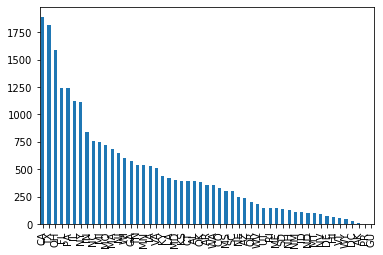

In [9]:
nh_df['STATE'].value_counts().plot(kind='bar')

In [10]:
state_counts = nh_df['STATE'].value_counts()

In [11]:
state_counts[state_counts > 500]

CA    1888
TX    1811
OH    1585
FL    1240
PA    1236
IL    1120
NY    1113
IN     835
NC     757
MI     749
MO     719
MA     684
NJ     644
WI     602
GA     572
TN     542
MN     536
IA     527
VA     508
Name: STATE, dtype: int64

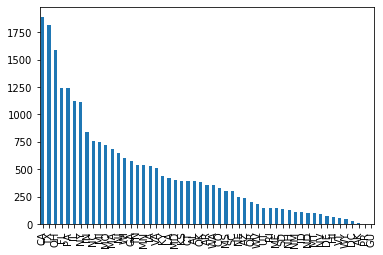

In [12]:
nh_df['STATE'].value_counts().plot(kind='bar')

In [13]:
nh_df = nh_df[nh_df['STATE'].isin(state_counts[state_counts > 500].index)]

In [16]:
nh_df['STAY_TYPE'].value_counts()

Long Stay     9699
Short Stay    7969
Name: STAY_TYPE, dtype: int64

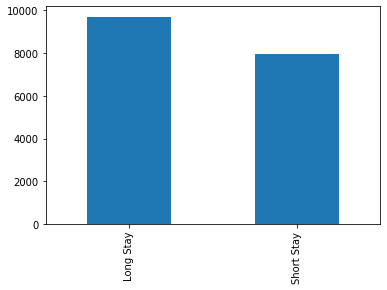

In [17]:
nh_df['STAY_TYPE'].value_counts().plot(kind='bar')

In [18]:
nh_df_long = nh_df[nh_df['STAY_TYPE'].str.contains("Long Stay")]
nh_df_short = nh_df[nh_df['STAY_TYPE'].str.contains("Short Stay")]

([array([111.,  18.,  55.,  95., 118., 141., 170., 207., 158., 213., 245.,
         302., 317., 305., 349., 341., 343., 346., 369., 301., 367., 351.,
         342., 276., 282., 313., 273., 284., 203., 278., 226., 171., 183.,
         150., 141., 136., 144., 124.,  89.,  87.,  98.,  68.,  63.,  51.,
          46.,  47.,  52.,  41.,  37.,  24.,  25.,  26.,  17.,  20.,  11.,
          18.,   9.,  13.,   9.,  12.,  10.,   9.,   7.,   4.,   9.,   6.,
           6.,   7.,   2.,   5.,   1.,   3.,   2.,   1.,   2.,   2.,   2.,
           1.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,
           3.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
           0.]),
  array([1.084e+03, 2.790e+02, 3.800e+02, 3.870e+02, 3.620e+02, 4.340e+02,
         4.380e+02, 4.490e+02, 3.850e+02, 4.410e+02, 4.660e+02, 4.930e+02,
         5.360e+02, 5.070e+02, 5.560e+02, 5.420e+02, 5.460e+02, 5.360e+02,
         5.460e+02, 4.640e+02, 5.390e+02, 5.060e+02, 4.970e+02, 4.330e+02,
        

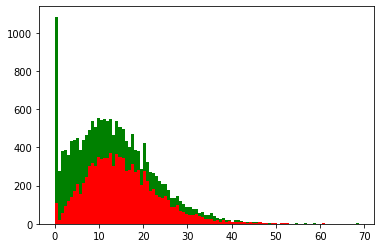

In [19]:
plt.hist([nh_df_long['Q1_MEASURE_SCORE'], nh_df_short['Q1_MEASURE_SCORE']],
        bins=100, stacked=True, color=['r', 'g'])

([array([140.,  38., 119., 161., 204., 226., 233., 302., 304., 368., 382.,
         362., 412., 369., 493., 417., 418., 346., 453., 380., 281., 400.,
         262., 249., 287., 238., 172., 184., 191., 143., 144.,  96., 117.,
         107.,  85.,  63.,  77.,  60.,  56.,  45.,  43.,  19.,  40.,  32.,
          23.,  16.,  14.,  14.,  14.,  15.,  11.,   9.,  10.,   4.,   8.,
           3.,   5.,   4.,   6.,   4.,   4.,   2.,   2.,   1.,   1.,   1.,
           0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
           1.]),
  array([1.247e+03, 3.790e+02, 4.460e+02, 5.060e+02, 5.130e+02, 5.260e+02,
         4.900e+02, 5.610e+02, 5.570e+02, 6.660e+02, 6.390e+02, 5.970e+02,
         6.440e+02, 5.960e+02, 7.210e+02, 6.290e+02, 6.110e+02, 5.060e+02,
         6.720e+02, 5.470e+02, 4.220e+02, 5.840e+02, 4.060e+02, 3.770e+02,
        

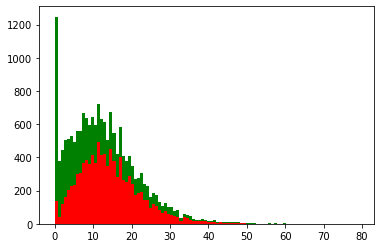

In [20]:
plt.hist([nh_df_long['Q2_MEASURE_SCORE'], nh_df_short['Q2_MEASURE_SCORE']],
        bins=100, stacked=True, color=['r', 'g'])

([array([154.,  56., 116., 218., 272., 298., 320., 382., 446., 386., 451.,
         481., 491., 388., 541., 404., 496., 425., 374., 352., 344., 255.,
         282., 205., 220., 173., 154., 119., 153.,  96.,  86.,  64.,  60.,
          60.,  54.,  39.,  35.,  37.,  37.,  21.,  24.,  12.,  19.,   8.,
          17.,   8.,   8.,   7.,  10.,   3.,   1.,   5.,   2.,   4.,   5.,
           1.,   7.,   0.,   0.,   1.,   1.,   4.,   1.,   0.,   1.,   0.,
           1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.]),
  array([1.317e+03, 4.180e+02, 4.940e+02, 5.760e+02, 6.150e+02, 5.990e+02,
         6.180e+02, 6.710e+02, 7.320e+02, 6.640e+02, 7.200e+02, 7.520e+02,
         7.320e+02, 6.090e+02, 7.830e+02, 6.060e+02, 7.160e+02, 6.280e+02,
         5.580e+02, 5.140e+02, 5.020e+02, 4.140e+02, 4.040e+02, 3.310e+02,
        

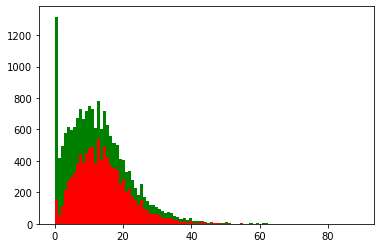

In [21]:
plt.hist([nh_df_long['Q3_MEASURE_SCORE'], nh_df_short['Q3_MEASURE_SCORE']],
        bins=100, stacked=True, color=['r', 'g'])

([array([177.,  26.,  88., 133., 174., 231., 239., 233., 319., 353., 345.,
         356., 367., 407., 399., 384., 442., 376., 374., 368., 345., 367.,
         320., 302., 267., 280., 217., 203., 201., 158., 136., 135., 103.,
         112.,  81.,  80.,  82.,  64.,  48.,  67.,  30.,  38.,  17.,  28.,
          29.,  27.,  29.,  21.,  14.,  12.,  11.,  11.,   4.,   4.,  10.,
           5.,   8.,   5.,   1.,   3.,   5.,   4.,   1.,   0.,   6.,   1.,
           1.,   1.,   3.,   0.,   1.,   2.,   3.,   2.,   0.,   2.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.]),
  array([1.34e+03, 3.71e+02, 4.27e+02, 4.51e+02, 4.83e+02, 5.29e+02,
         4.96e+02, 5.00e+02, 5.59e+02, 6.15e+02, 6.18e+02, 5.74e+02,
         6.06e+02, 6.19e+02, 5.90e+02, 5.85e+02, 6.11e+02, 5.54e+02,
         5.45e+02, 5.60e+02, 4.98e+02, 5.28e+02, 4.57e+02, 4.39e+02,
         3.82e+02, 3.80e+02, 3.1

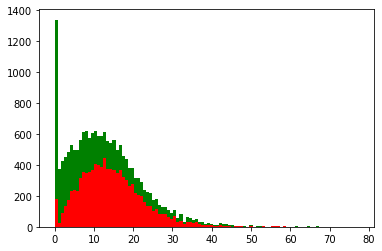

In [22]:
plt.hist([nh_df_long['Q4_MEASURE_SCORE'], nh_df_short['Q4_MEASURE_SCORE']],
        bins=100, stacked=True, color=['r', 'g'])

([array([ 17.,   6.,  29.,  41.,  74.,  84., 118., 141., 185., 223., 237.,
         274., 293., 322., 369., 406., 419., 412., 446., 458., 458., 493.,
         430., 422., 406., 355., 319., 297., 240., 268., 203., 173., 154.,
         125., 109., 109.,  85.,  81.,  60.,  69.,  56.,  45.,  34.,  27.,
          19.,  19.,  22.,  10.,  11.,   9.,  10.,   9.,   5.,   1.,   2.,
           2.,   0.,   0.,   2.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.]),
  array([715., 373., 325., 342., 401., 363., 370., 393., 430., 464., 458.,
         485., 526., 576., 595., 647., 617., 614., 652., 635., 643., 691.,
         573., 563., 552., 507., 441., 421., 349., 385., 306., 258., 247.,
         208., 186., 160., 142., 127., 108., 118.,  91.,  90.,  62.,  62.,
        

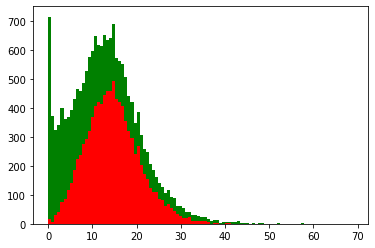

In [23]:
plt.hist([nh_df_long['MEASURE_SCORE_4QTR_AVG'], 
          nh_df_short['MEASURE_SCORE_4QTR_AVG']],
        bins=100, stacked=True, color=['r', 'g'])

In [24]:
nh_df_long.describe()

,Q1_MEASURE_SCORE,Q2_MEASURE_SCORE,Q3_MEASURE_SCORE,Q4_MEASURE_SCORE,MEASURE_SCORE_4QTR_AVG
count,9699.000000,9699.000000,9699.000000,9699.000000,9699.000000
mean,15.409362,14.371284,14.101325,14.521450,14.605257
std,8.256542,8.121165,8.006323,8.087188,6.099655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.562020,8.695650,8.394280,8.750000,10.360359
50%,14.285710,13.274340,13.095240,13.513510,14.207651
75%,20.000000,18.908280,18.367350,19.004130,18.229167
max,65.625000,79.207920,89.090910,77.500000,52.142857


In [25]:
nh_df_short.describe()

,Q1_MEASURE_SCORE,Q2_MEASURE_SCORE,Q3_MEASURE_SCORE,Q4_MEASURE_SCORE,MEASURE_SCORE_4QTR_AVG
count,7969.000000,7969.000000,7969.000000,7969.000000,7969.000000
mean,10.998312,10.641955,10.852328,10.675108,10.777399
std,9.653358,9.540920,9.842669,9.855211,8.940395
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.157890,2.868850,2.884620,2.666670,3.448275
50%,8.943090,8.571430,8.695650,8.333330,9.122806
75%,16.666670,16.088330,16.216220,16.176470,15.950919
max,68.750000,69.148940,71.794870,72.500000,68.882177


In [26]:
nh_df_long.describe(include=['object'])

,PROVNUM,PROVNAME,STATE,MSR_DESCR,STAY_TYPE
count,9699,9699,9699,9699,9699
unique,9699,9569,19,1,1
top,165341,MILLER'S MERRY MANOR,TX,Percentage of long-stay residents whose need f...,Long Stay
freq,1,29,1069,9699,9699


In [27]:
nh_df_short.describe(include=['object'])

,PROVNUM,PROVNAME,STATE,MSR_DESCR,STAY_TYPE
count,7969,7969,7969,7969,7969
unique,7969,7883,19,1,1
top,145364,MILLER'S MERRY MANOR,CA,Percentage of short-stay residents who self-re...,Short Stay
freq,1,25,891,7969,7969


In [28]:
# https://stackoverflow.com/questions/43291230/plotting-multiple-density-curves-on-the-same-plot-weighting-the-subset-categori

In [29]:
nh_df_short_ca = nh_df_short[nh_df_short.STATE == 'CA']
nh_df_short_tx = nh_df_short[nh_df_short.STATE == 'TX']

In [30]:
CA = nh_df_short_ca['Q1_MEASURE_SCORE']
TX = nh_df_short_tx['Q1_MEASURE_SCORE']

In [33]:
kdea = scipy.stats.gaussian_kde(CA)
kdeb = scipy.stats.gaussian_kde(TX)

In [34]:
both = np.hstack((CA,TX))
kdeboth = scipy.stats.gaussian_kde(both)
grid = np.arange(100)

In [35]:
wa = kdea(grid)*(len(CA)/float(len(both)))
wb = kdeb(grid)*(len(TX)/float(len(both)))

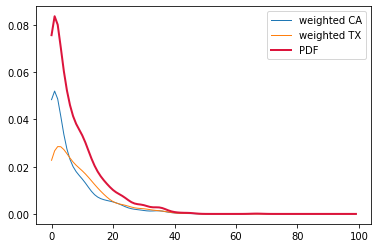

In [36]:
fig, ax = plt.subplots()
ax.plot(grid, wa, lw=1, label = "weighted CA")
ax.plot(grid, wb, lw=1, label = "weighted TX")
ax.plot(grid, kdeboth(grid), color="crimson", lw=2, label = "PDF")

plt.legend()
plt.show()

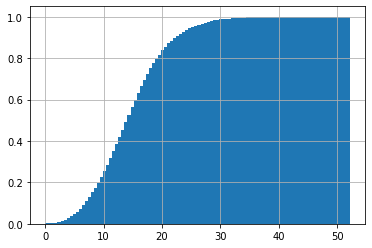

In [37]:
nh_df_long['MEASURE_SCORE_4QTR_AVG'].hist(cumulative=True, density=1,bins=100)

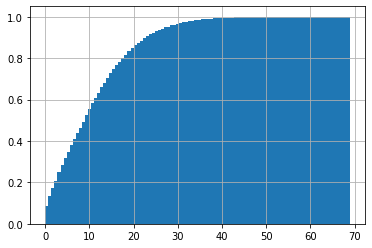

In [38]:
nh_df_short['MEASURE_SCORE_4QTR_AVG'].hist(cumulative=True, density=1, bins=100)

In [39]:
# https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib

In [40]:
avg_score_long = sorted(nh_df_long['MEASURE_SCORE_4QTR_AVG'])
avg_score_short = sorted(nh_df_short['MEASURE_SCORE_4QTR_AVG'])

In [41]:
fit1 = stats.norm.pdf(avg_score_long, np.mean(avg_score_long), np.std(avg_score_long))
fit2 = stats.norm.pdf(avg_score_short, np.mean(avg_score_short), np.std(avg_score_short))

(array([8.83864601e-03, 3.97640204e-02, 6.60822259e-02, 4.93738234e-02,
        1.92789259e-02, 6.52517491e-03, 1.66095361e-03, 1.97732573e-04,
        3.95465146e-05, 1.97732573e-05]),
 array([ 0.       ,  5.2142857, 10.4285714, 15.6428571, 20.8571428,
        26.0714285, 31.2857142, 36.4999999, 41.7142856, 46.9285713,
        52.142857 ]),
 <a list of 10 Patch objects>)

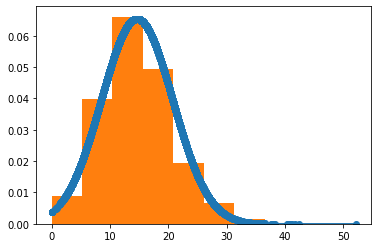

In [42]:
pl.plot(avg_score_long, fit1, '-o')
pl.hist(avg_score_long,density=True)

(array([5.93526875e-02, 3.95138058e-02, 2.61785795e-02, 1.26065254e-02,
        5.10090623e-03, 1.60314196e-03, 6.01178234e-04, 7.28700890e-05,
        9.10876113e-05, 5.46525668e-05]),
 array([ 0.       ,  6.8882177, 13.7764354, 20.6646531, 27.5528708,
        34.4410885, 41.3293062, 48.2175239, 55.1057416, 61.9939593,
        68.882177 ]),
 <a list of 10 Patch objects>)

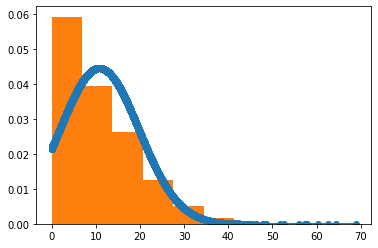

In [43]:
pl.plot(avg_score_short, fit2, '-o')
pl.hist(avg_score_short,density=True)

In [44]:
counts, start, dx, _ = scipy.stats.cumfreq(avg_score_long, numbins=100)
x = np.arange(counts.size) * dx + start

Text(0, 0.5, 'Cumulative Frequency')

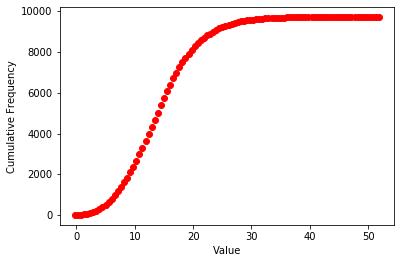

In [45]:
plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

In [46]:
counts, start, dx, _ = scipy.stats.cumfreq(avg_score_short, numbins=100)
x = np.arange(counts.size) * dx + start

Text(0, 0.5, 'Cumulative Frequency')

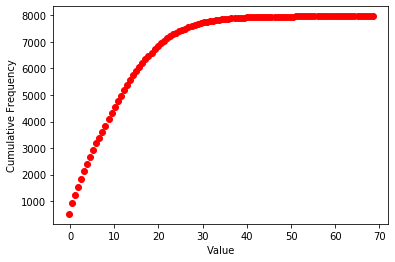

In [47]:
plt.plot(x, counts, 'ro')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')

In [48]:
nh_df_long = nh_df[nh_df['STAY_TYPE'].str.contains("Long Stay")]
nh_df_short = nh_df[nh_df['STAY_TYPE'].str.contains("Short Stay")]

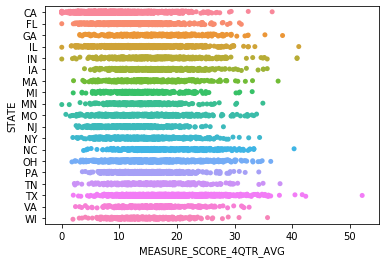

In [49]:
sb.stripplot(x="MEASURE_SCORE_4QTR_AVG", y="STATE", data=nh_df_long, jitter=True)

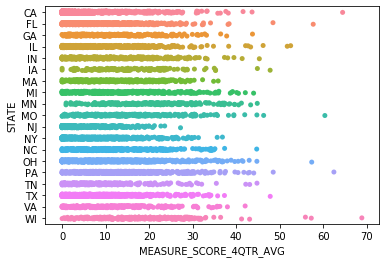

In [50]:
sb.stripplot(x="MEASURE_SCORE_4QTR_AVG", y="STATE", data=nh_df_short, jitter=True)

In [51]:
# http://pythonfordatascience.org/wilcoxon-sign-ranked-test-python/

In [52]:
nh_df_long['2018_diff'] = nh_df_long['Q1_MEASURE_SCORE'] - nh_df_long['Q4_MEASURE_SCORE']

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
stats.wilcoxon(nh_df_long['2018_diff'])

WilcoxonResult(statistic=20433726.5, pvalue=6.40807478634749e-22)

In [54]:
nh_df_short['2018_diff'] = nh_df_short['Q1_MEASURE_SCORE'] - nh_df_short['Q4_MEASURE_SCORE']

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
stats.wilcoxon(nh_df_short['2018_diff'])

WilcoxonResult(statistic=13090841.0, pvalue=1.9049953049238154e-05)

In [56]:
# https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables

In [ ]:
# https://www.datacamp.com/community/tutorials/categorical-data

In [57]:
print(nh_df_long.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9699 entries, 12440 to 310660
Data columns (total 11 columns):
PROVNUM                   9699 non-null object
PROVNAME                  9699 non-null object
STATE                     9699 non-null object
MSR_DESCR                 9699 non-null object
STAY_TYPE                 9699 non-null object
Q1_MEASURE_SCORE          9699 non-null float64
Q2_MEASURE_SCORE          9699 non-null float64
Q3_MEASURE_SCORE          9699 non-null float64
Q4_MEASURE_SCORE          9699 non-null float64
MEASURE_SCORE_4QTR_AVG    9699 non-null float64
2018_diff                 9699 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB
None


In [58]:
print(nh_df_short.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7969 entries, 12451 to 310871
Data columns (total 11 columns):
PROVNUM                   7969 non-null object
PROVNAME                  7969 non-null object
STATE                     7969 non-null object
MSR_DESCR                 7969 non-null object
STAY_TYPE                 7969 non-null object
Q1_MEASURE_SCORE          7969 non-null float64
Q2_MEASURE_SCORE          7969 non-null float64
Q3_MEASURE_SCORE          7969 non-null float64
Q4_MEASURE_SCORE          7969 non-null float64
MEASURE_SCORE_4QTR_AVG    7969 non-null float64
2018_diff                 7969 non-null float64
dtypes: float64(6), object(5)
memory usage: 1.0+ MB
None


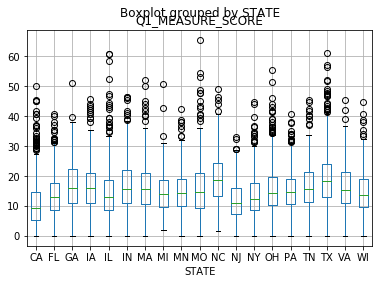

In [59]:
nh_df_long.boxplot('Q1_MEASURE_SCORE', 'STATE')

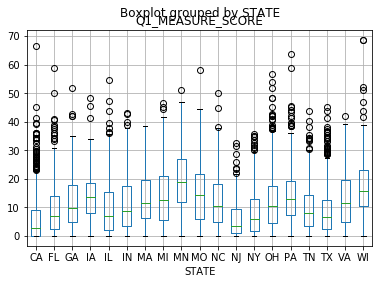

In [60]:
nh_df_short.boxplot('Q1_MEASURE_SCORE', 'STATE')

In [66]:
nh_df_long['STATE'] = nh_df_long['STATE'].astype('category')
nh_df_long['STATE_cat'] = nh_df_long['STATE'].cat.codes
nh_df_short['STATE'] = nh_df_short['STATE'].astype('category')
nh_df_short['STATE_cat'] = nh_df_short['STATE'].cat.codes

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [68]:
x = nh_df_long[['Q1_MEASURE_SCORE', 'Q4_MEASURE_SCORE']]
y = nh_df_long['STATE_cat']

In [69]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 6.167854054827047
Coefficients: 
 [0.06476044 0.1093283 ]


In [71]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              STATE_cat   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     216.7
Date:                Fri, 31 May 2019   Prob (F-statistic):           8.16e-93
Time:                        15:23:22   Log-Likelihood:                -30507.
No. Observations:                9699   AIC:                         6.102e+04
Df Residuals:                    9696   BIC:                         6.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.1679      0.139  

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [72]:
x = nh_df_short[['Q1_MEASURE_SCORE', 'Q4_MEASURE_SCORE']]
y = nh_df_short['STATE_cat']

In [73]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 7.927198611673516
Coefficients: 
 [0.03715318 0.04579577]


In [75]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              STATE_cat   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     66.54
Date:                Fri, 31 May 2019   Prob (F-statistic):           2.20e-29
Time:                        15:24:46   Log-Likelihood:                -25256.
No. Observations:                7969   AIC:                         5.052e+04
Df Residuals:                    7966   BIC:                         5.054e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.9272      0.101  

C:\Users\tdrace\AppData\Local\Continuum\anaconda3\envs\main\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
